## Regresion lineal  

In [1]:
### Modelo con datos simulados 
# y = a + b*x
# x: 100 valores distribuidos segun un N(1.5, 2.5)
# Y= 2 + 0.3* X + e
# e : estara distribuido segun una N(0, 0.8)


In [2]:
import pandas as pd
import numpy as np

In [3]:
x = 1.5 + 2.5 * np.random.randn(100)
res = 0 + 0.8* np.random.randn(100)

In [4]:
y_pred1= 2 + 0.3* x
y_actual1= 2 + 0.3* x + res

In [5]:
x_list = x.tolist()
y_pred_list= y_pred1.tolist()
y_actual_list = y_actual1.tolist()

In [6]:
data= pd.DataFrame (
    {
        "x": x_list,
        "y_pred": y_pred_list,
        "y_actual": y_actual_list,
    }
)

In [7]:
data.head()

,x,y_pred,y_actual
0,-0.516126,1.845162,3.783850
1,-0.911943,1.726417,1.617241
2,1.311580,2.393474,1.040901
3,2.961042,2.888313,3.162449
4,0.528634,2.158590,2.655660


In [8]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, ' Valor actual vs prediccion')

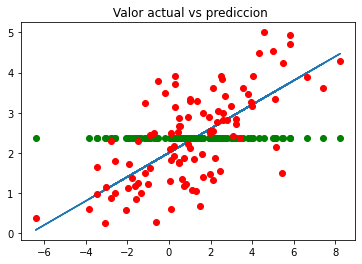

In [9]:
y_mean = [np.mean(y_actual1) for i in range(1, len(x_list)+1)]
%matplotlib inline
plt.plot(x, y_pred1)
plt.plot(x, y_mean, "go")
plt.plot(x, y_actual1, "ro")
plt.title( " Valor actual vs prediccion")


In [10]:
data["ssr"]= (data["y_pred"]- np.mean(y_actual1))**2
data["SSD"]= (data["y_pred"]- data["y_actual"])**2
data["SST"]= (data["y_actual"]- np.mean(y_actual1))**2

In [11]:
data.head()

,x,y_pred,y_actual,ssr,SSD,SST
0,-0.516126,1.845162,3.783850,0.275974,3.758512,1.997576
1,-0.911943,1.726417,1.617241,0.414835,0.011919,0.567391
2,1.311580,2.393474,1.040901,0.000528,1.829455,1.767819
3,2.961042,2.888313,3.162449,0.268136,0.075151,0.627193
4,0.528634,2.158590,2.655660,0.044903,0.247078,0.081319


In [12]:
SSR= sum(data["ssr"])
SSD= sum(data["SSD"])
SST= sum(data["SST"])

In [13]:
SSR

62.5609155778156

In [14]:
SSD

69.75720024839319

In [15]:
SST

130.7677778139857

In [16]:
R2=SSR/SST

In [17]:
R2

0.47841231703736015

(array([ 6.,  4., 12., 16., 17., 22., 10.,  7.,  4.,  2.]),
 array([-1.93868821, -1.5305094 , -1.12233059, -0.71415178, -0.30597297,
         0.10220584,  0.51038465,  0.91856346,  1.32674227,  1.73492108,
         2.1430999 ]),
 <BarContainer object of 10 artists>)

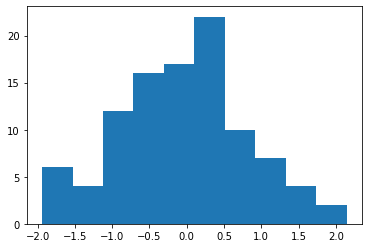

In [18]:
plt.hist(data["y_pred"]- data["y_actual"])

 ### Obtener la recta de regresion

In [19]:
# y = a + b*x
# b = sum((xi-x_m)*(yi-y_m))/sum(xi-x_m)^2)
# a = y_m-b*x_m


In [20]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])

In [21]:
data["Cov"]= (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["b_d"]=(data["x"]-x_mean)**2

In [22]:
b= sum(data["Cov"])/sum(data["b_d"])

In [23]:
b

0.29696382299782037

In [24]:
alpha= y_mean-b*x_mean

In [25]:
alpha,b

(2.041243399596715, 0.29696382299782037)

In [26]:
data["y_model"]= alpha + b*data["x"]

In [27]:
data.head()

,x,y_pred,y_actual,ssr,SSD,SST,Cov,b_d,y_model
0,-0.516126,1.845162,3.783850,0.275974,3.758512,1.997576,-2.296492,2.640137,1.887973
1,-0.911943,1.726417,1.617241,0.414835,0.011919,0.567391,1.522075,4.083094,1.770429
2,1.311580,2.393474,1.040901,0.000528,1.829455,1.767819,-0.269717,0.041151,2.430735
3,2.961042,2.888313,3.162449,0.268136,0.075151,0.627193,1.466953,3.431084,2.920566
4,0.528634,2.158590,2.655660,0.044903,0.247078,0.081319,-0.165422,0.336505,2.198228


In [28]:
SSR= sum((data["y_model"]- np.mean(y_actual1))**2)
SSD= sum((data["y_model"]- data["y_actual"])**2)
SST= sum((data["y_actual"]- np.mean(y_actual1))**2)

In [29]:
SSR, SSD, SST

(61.16043836235908, 69.60733945162669, 130.7677778139857)

In [30]:
R2 = SSR /SST

In [31]:
R2

0.4677026663965986

Text(0.5, 1.0, ' Valor actual vs prediccion')

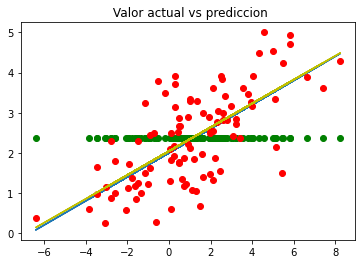

In [35]:
y_mean = [np.mean(y_actual1) for i in range(1, len(x_list)+1)]
%matplotlib inline
plt.plot(x, y_pred1)
plt.plot(x, y_mean, "go")
plt.plot(x, y_actual1, "ro")
plt.plot(x, data["y_model"], "y")
plt.title( " Valor actual vs prediccion")

### Error estandar de los residuos (RSE)

In [37]:
RSE= np.sqrt(SSD/(len(data)-2))

In [38]:
RSE

0.8427805016706252